In [119]:
##################################################################################################################
# 
#   Seaborn learning rate visualization example
#
#   Author: Philip Bramwell
#   Date: 16 December
# 
#   goal: 
#         * Visualize how the costfunction and partial derivatives of the costfunction 
#            are affected by the learning rate 
#
#   Documentation: https://seaborn.pydata.org/index.html
#
#   Index: 
#         1. Libary Imports
#         2. Variable Definition and load Dataset
#         3. Function Defintion
#         4. Visualize Datapoints
#         5. Visualize change of the costfunction over time, learning rate dependent
#         6. Visualize change of the derivatives over interations, learning rate dependent
#
##################################################################################################################

## Imports

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Variables

In [126]:
# creates randomized linearly correlated datapoints 
x_values = np.random.uniform(0, 1, 500)
y_values = x_values + np.random.normal(1, 0.1, 500)

# will be used for the slope and bias of the predicted y value
theta0 = 0
theta1 = 0

# learning_rates from 0.01 to 0.1
learning_rates = np.arange(1, 11) * 0.01

# creates dataframe containing the x_values and y_values as columns x and y
df = pd.DataFrame(np.array([x_values, y_values]).T, columns=['x', 'y'])

# creates additional columns which will be used to show the change of the costfunction and the partial derivatives
df['costfunction_y'] = np.ones(len(x_values))
df['derivative_m'] = np.ones(len(x_values))
df['derivative_b'] = np.ones(len(x_values))

df.head()

,x,y,costfunction_y,derivative_m,derivative_b
0,0.929341,2.200862,1.0,1.0,1.0
1,0.283045,1.170268,1.0,1.0,1.0
2,0.436204,1.585125,1.0,1.0,1.0
3,0.006400,1.257168,1.0,1.0,1.0
4,0.799228,1.857513,1.0,1.0,1.0


## Functions

In [127]:
def y_prediction(theta0, theta1):
    return theta1 * x_values + theta0

def costfunction(theta0, theta1):
    y_predicted = y_prediction(theta0, theta1)
    return np.mean((y_values - y_predicted) ** 2)

def update_weights(theta0, theta1, x, y, alpha=0.01):
    n = len(x)
    derivative_theta0 = (-2 / n) * np.sum(y - theta0 - theta1 * x)
    derivative_theta1 = (-2 / n) * np.sum((y - theta0 - theta1 * x) * x)
    
    theta0 = theta0 - alpha * derivative_theta0
    theta1 = theta1 - alpha * derivative_theta1
    
    return theta1, theta0 

## Visualize Datapoints

<AxesSubplot:xlabel='x', ylabel='y'>

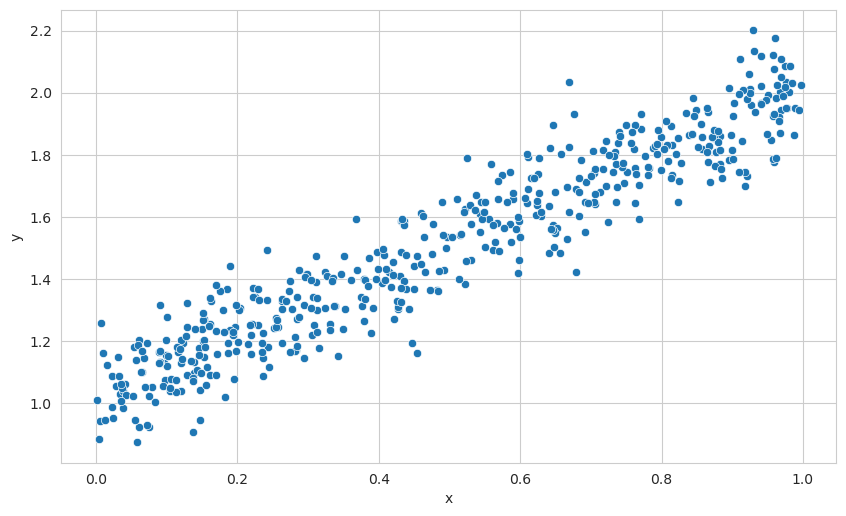

In [128]:
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(data=df, x='x', y='y')

## Visualize change of the costfunction over time, learning rate dependent

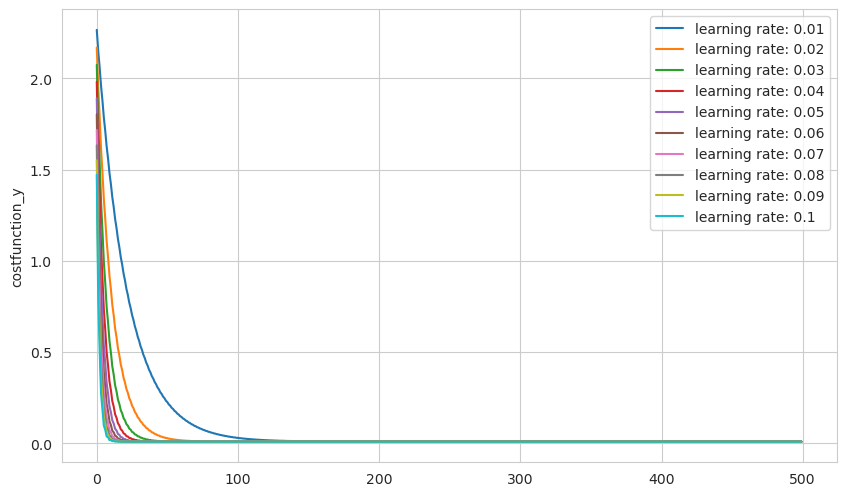

In [129]:
# set the figuresize and the dpi value for the plot with a whitegrid as background
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style('whitegrid')

# iterates throw all learning_rate values
for i in range(len(learning_rates)):
    theta1, theta0 = 0, 0
    
    for j in range(len(df)):
        # updates the slope and bias with gradient decent
        theta1, theta0 = update_weights(theta1, theta0, x_values, y_values, learning_rates[i])
        
        # writes value of the current costfunction value to row j of the dataframe in column 'costfunction_y'
        df['costfunction_y'].iloc[j] = costfunction(theta1, theta0)

    # creates a linplot for each learning rate with the datapoints from the updated costfunction values
    sns.lineplot(data=df, x=np.arange(len(df)), y='costfunction_y', label=f'learning rate: {learning_rates[i]}')
    
plt.legend()

## Visualize change of the derivatives over interations, learning rate dependent

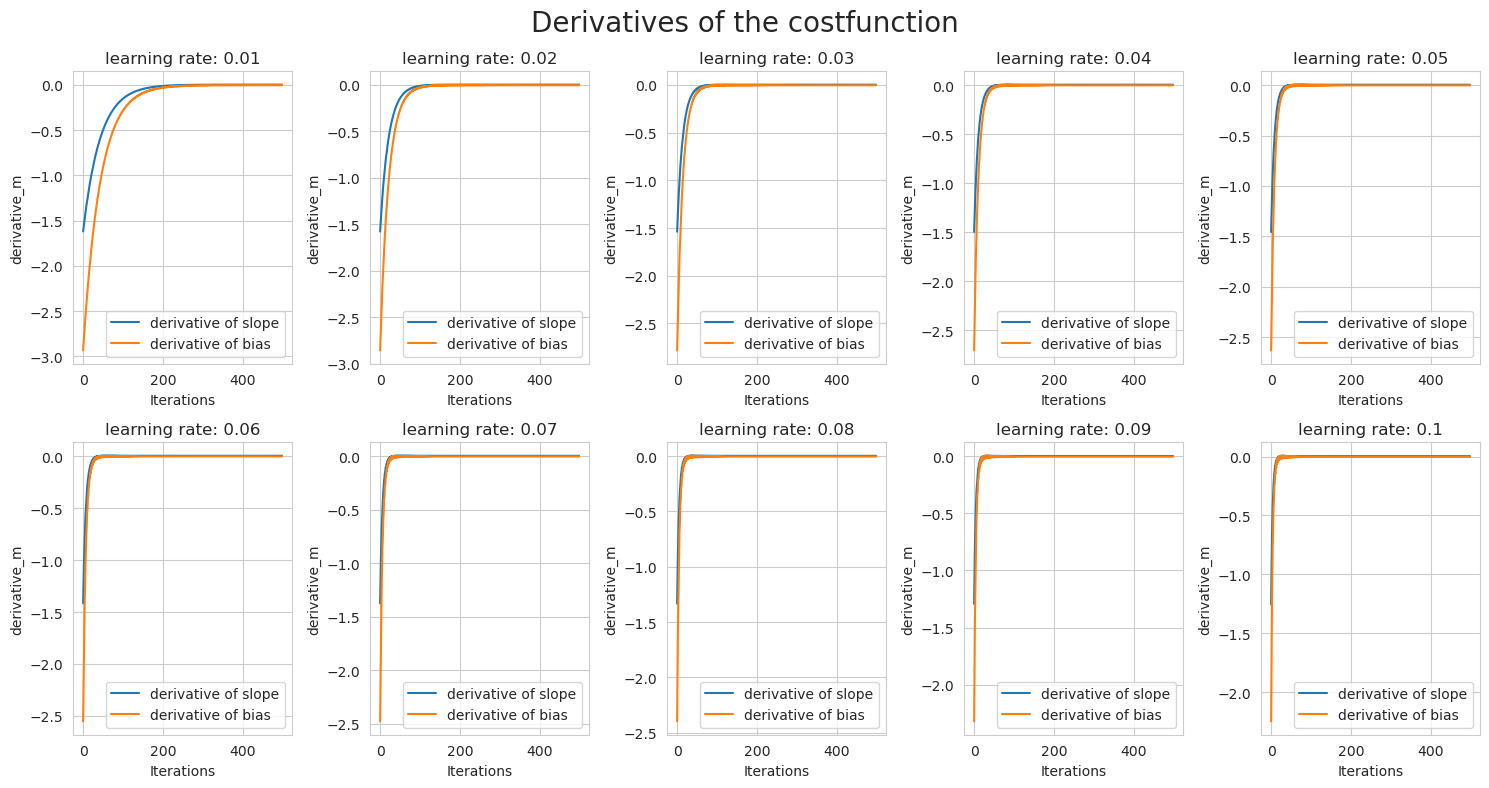

In [131]:
# create matplotlib figure and 10 axes (2 rows and 5 columns)
fig, axes = plt.subplots(nrows=2, ncols= 5, figsize=(15, 8), dpi=100)

fig.suptitle('Derivatives of the costfunction', fontsize=20)

sns.set_style('whitegrid')

for i in range(len(learning_rates)):
    theta1, theta0 = 0, 0
    for j in range(len(df)):
        # updates the slope and bias with gradient decent
        theta1, theta0 = update_weights(theta1, theta0, x_values, y_values, learning_rates[i])
        
        # writes values of the current partial derivative values to row j of the dataframe in column 'derivative_m' and 'derivative_b'
        df['derivative_m'].iloc[j] = (-2 / len(df)) * np.sum(y_values * x_values - theta0 * x_values - theta1 * (x_values ** 2))
        df['derivative_b'].iloc[j] = (-2 / len(df)) * np.sum(y_values - theta0 - theta1 * x_values)

    # modifies axes which where creates by the matplotlib subplots function call
    axes[0 if i < 5 else 1, i % 5].set_xlabel('Iterations')
    axes[0 if i < 5 else 1, i % 5].set_title(f'learning rate: {learning_rates[i]}')
    
    # creates a linplot for each learning rate with the datapoints from the updated partial derivative values
    sns.lineplot(data=df, x=np.arange(len(df)), y='derivative_m', ax=axes[0 if i < 5 else 1, i % 5], label='derivative of slope')
    sns.lineplot(data=df, x=np.arange(len(df)), y='derivative_b', ax=axes[0 if i < 5 else 1, i % 5], label='derivative of bias')
    
plt.tight_layout()